<a href="https://colab.research.google.com/github/m-a-hasan/ai-colab/blob/main/02_neural_network_classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

There are mainly 3 types of classification problems
1. Binary classification
2. Multiclass classification
3. Multilabel classification

Creating data to view and fit



In [ ]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [ ]:
# For 2 values of X, we have 1 value for y.
# Y is 0 or 1 (yes/no), so it is a binary class problem.
X, y[:15]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1]))

In [ ]:
# Visualize data by creating 3 columns
import pandas as pd
from pandas import DataFrame as df

circles = df({"X0":X[:, 0], "X1":X[:, 1], "Label":y})
circles

,X0,X1,Label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


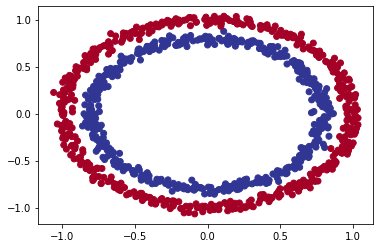

In [ ]:
# Visualize with plot
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [ ]:
# Shape of features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# Split train-test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X_train), len(y_train)

(800, 800)

In [ ]:
import tensorflow as tf
tf.__version__

'2.8.2'

In [ ]:
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    #tf.keras.Input(shape=(None, 32, 2)),
    #tf.keras.layers.Dense(100, activation="relu"),
    #tf.keras.layers.Dense(1, activation="softmax")
    tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=["accuracy"])

# Fit the model
model_1.fit(X_train, y_train, epochs=5, verbose=0)

# Evaluate the model
model_1.evaluate(X_test, y_test)

# Looks like the model is purely guessing with only 49% accuracy (50% means it's just guessing)

7/7 [==============================] - 0s 7ms/step - loss: 0.6954 - accuracy: 0.4950


[0.6954172253608704, 0.4950000047683716]

In [ ]:
# Trying to improve by training for longer
model_1.fit(X_train, y_train, epochs=100, verbose=0)

# Evaluate the model
model_1.evaluate(X_test, y_test)

7/7 [==============================] - 0s 7ms/step - loss: 0.6945 - accuracy: 0.4800


[0.6944702863693237, 0.47999998927116394]

In [ ]:
# Adding an extra layer
# Set random seed
tf.random.set_seed(42)

# 1. Create model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile model
model_2.compile(
    optimizer=tf.keras.optimizers.SGD(),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=["accuracy"]
)

# 3. Fit the model
model_2.fit(X_train, y_train, epochs=100, verbose=0)

# 4. Evaluate the model
model_2.evaluate(X_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.6947 - accuracy: 0.4800


[0.6947243213653564, 0.47999998927116394]

In [ ]:
# Improving our model
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=["accuracy"]
)

model_3.fit(X_train, y_train, epochs=100, verbose=0)

model_3.evaluate(X_test, y_test)


7/7 [==============================] - 0s 3ms/step - loss: 0.6948 - accuracy: 0.5650


[0.6947647929191589, 0.5649999976158142]

In [ ]:
# Function to plot prediction
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots decision boundary
  """
  # Define axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X value (we're going to make predictions on these values)
  x_in = np.c_[xx.ravel(), yy.ravel()] # Stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check if it is multiclass
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    # Reshape for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    # Otherwise, for binary classification
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())


doing binary classification


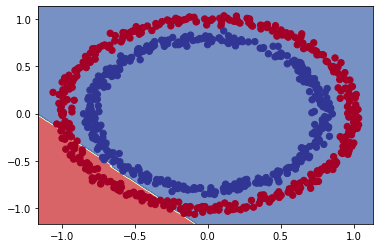

In [ ]:
# Check the predictions of the model
plot_decision_boundary(model=model_3,
                       X=X_train,
                       y=y_train)

# It is doing so poorly because it is trying to do linear regression on a circular data

In [ ]:
# Let's see if our model is good for regression problems
tf.random.set_seed(42)

# Create regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5)

X_regression, y_regression
# y = X + 100

# Split our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[-50:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[-50:]
X_reg_train, X_reg_test, y_reg_train, y_reg_test

(<tf.Tensor: shape=(150,), dtype=int32, numpy=
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
        130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190,
        195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255,
        260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320,
        325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385,
        390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450,
        455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515,
        520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 570, 575, 580,
        585, 590, 595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645,
        650, 655, 660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710,
        715, 720, 725, 730, 735, 740, 745], dtype=int32)>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([750, 755, 760, 765, 770, 775, 780, 78

In [ ]:
# Fit model to the regression data
# It won't work because we created the model for binary classification
# model_3.fit(X_reg_train, y_reg_train, epochs=100)

In [ ]:
# Setup random seed
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=[1]),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_4.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.mae,
                metrics=["mae"])

model_4.fit(X_reg_train, y_reg_train, epochs=100, verbose=0)

model_4.evaluate(X_reg_test, y_reg_test)

2/2 [==============================] - 0s 8ms/step - loss: 57.8927 - mae: 57.8927


[57.892669677734375, 57.89266586303711]

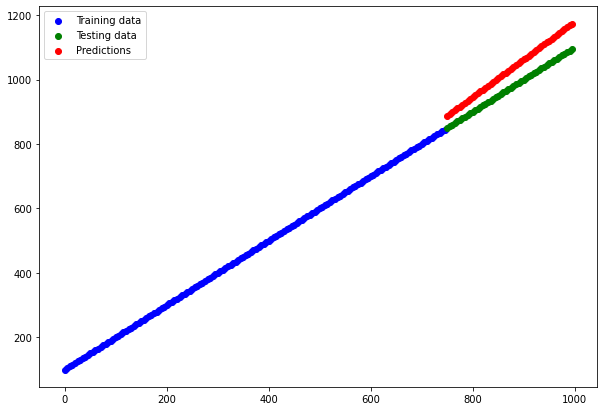

In [ ]:
# Let's predict
y_reg_preds = model_4.predict(X_reg_test)

# Plot model's prediction against regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Testing data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend()

# This means our model has learnt the regression problem

The problem is, non-linearity

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# Compile the model
model_4.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=["accuracy"])

# Fit model
history = model_4.fit(X_train, y_train, epochs=100, verbose=0)

# Evaluate model
model_4.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.7087 - accuracy: 0.4500


[0.7087266445159912, 0.44999998807907104]

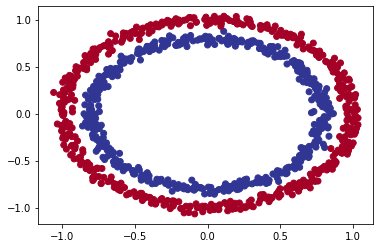

In [ ]:
# Visualizing data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

doing binary classification


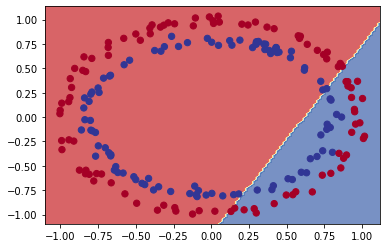

In [ ]:
# Check decision boundary for latest model
plot_decision_boundary(model_4, X_test, y_test)

In [ ]:
# Try with non-linear activation function
# First adjust hyperparameters in https://playground.tensorflow.org/ to check what we need to make it perform better
# Set seed
tf.random.set_seed(42)

# Create model with non-linear function
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(5, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])

# Compile
model_5.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=["accuracy"])

# Fit
model_5.fit(X_train, y_train, epochs=200, verbose=0)

# Evaluate
model_5.evaluate(X_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 7.6246 - accuracy: 0.5000


[7.624619007110596, 0.5]

doing binary classification


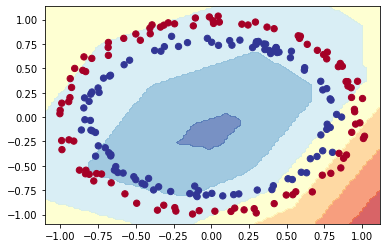

In [ ]:
# Visualize
plot_decision_boundary(model_5, X_test, y_test)
# It looks better but not good enough

WHAT A WINNER!!!

In [ ]:
# Introducing output layer activation "sigmoid"
# Set seed
tf.random.set_seed(42)

# Create
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(5, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

# Compile
model_6.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=["accuracy"])

# Fit
history = model_6.fit(X_train, y_train, epochs=25, verbose=0)

# Evaluate
model_6.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0450 - accuracy: 1.0000


[0.04495729133486748, 1.0]

doing binary classification
doing binary classification


<function matplotlib.pyplot.show>

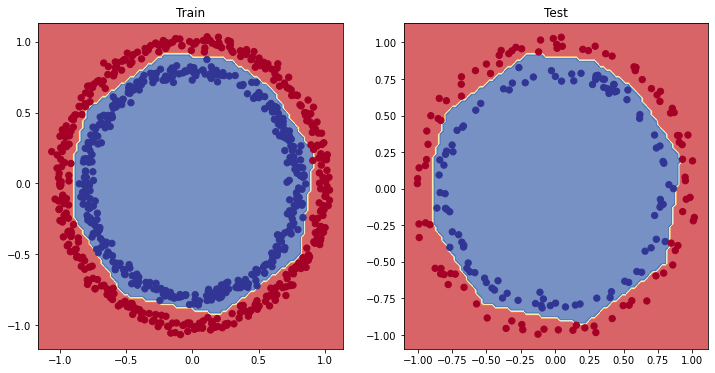

In [ ]:
# Visualize decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_6, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_6, X_test, y_test)
plt.show

Trying to use sigmoid function for linear regression problems

In [ ]:
# Create a sample tensor
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

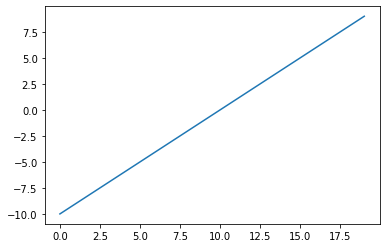

In [ ]:
plt.plot(A)

Formula for sigmoid

S(x) = 1 / (1 + exp(-x))

In [ ]:
# Create sigmoid
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

In [ ]:
# Use sigmoid on A
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

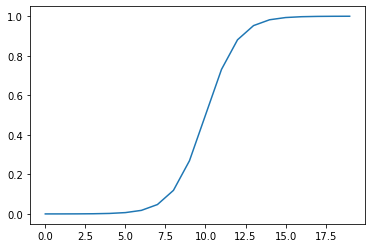

In [ ]:
# Visualize
plt.plot(sigmoid(A))

All sigmoid did is took a linear line and put curves on it

Let's check what relu does

In [ ]:
# Let's create relu function
def relu(x):
  return tf.maximum(0, x)

In [ ]:
# Let's see what it does to A
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

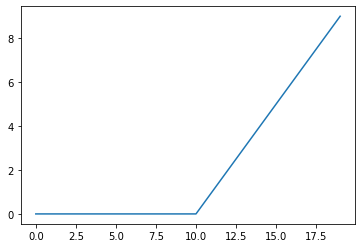

In [ ]:
# Visualize
plt.plot(relu(A))

Essentially what we did was giving tensorflow a curvy line and a bendy line instead of just a line and told it to do it's best prediction

In [ ]:
# Plot the loss (training) curve
history.history

{'accuracy': [0.48875001072883606,
  0.5412499904632568,
  0.5612499713897705,
  0.6000000238418579,
  0.5912500023841858,
  0.6625000238418579,
  0.800000011920929,
  0.8987500071525574,
  0.9424999952316284,
  0.9262499809265137,
  0.9862499833106995,
  0.9912499785423279,
  0.9937499761581421,
  0.9962499737739563,
  0.9975000023841858,
  0.9950000047683716,
  0.9962499737739563,
  0.9987499713897705,
  0.9987499713897705,
  0.9962499737739563,
  0.9912499785423279,
  0.9975000023841858,
  0.9975000023841858,
  0.9975000023841858,
  0.9975000023841858],
 'loss': [0.691437840461731,
  0.6842311024665833,
  0.6761044859886169,
  0.6663381457328796,
  0.6541554927825928,
  0.6297674775123596,
  0.5825793743133545,
  0.5092392563819885,
  0.3999547064304352,
  0.3396582305431366,
  0.24178363382816315,
  0.1887568235397339,
  0.1508101224899292,
  0.12257950007915497,
  0.09923694282770157,
  0.08507735282182693,
  0.07616864889860153,
  0.062368474900722504,
  0.05593753978610039,
  0.

In [ ]:
# Convert it into dataframe
df(history.history)

,loss,accuracy
0,0.691438,0.48875
1,0.684231,0.54125
2,0.676104,0.56125
3,0.666338,0.60000
4,0.654155,0.59125
5,0.629767,0.66250
6,0.582579,0.80000
7,0.509239,0.89875
8,0.399955,0.94250
9,0.339658,0.92625


Text(0.5, 1.0, 'model_6 loss curve')

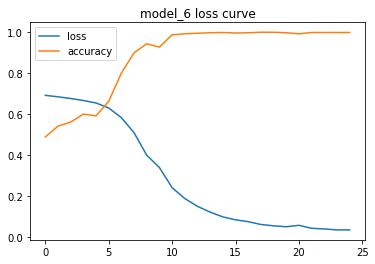

In [ ]:
# Plot the loss curve
df(history.history).plot()
plt.title("model_6 loss curve")

Loss function is how wrong our model is, it is going down is a nice thing

Find the best learning rate using **callback**

In [ ]:
# Random seed
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_9.compile(optimizer="Adam",
                loss="binary_crossentropy",
                metrics=["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model by passing lr_scheduler callback
history_9 = model_9.fit(X_train,
                        y_train,
                        epochs=100,
                        callbacks=[lr_scheduler],
                        verbose=0)

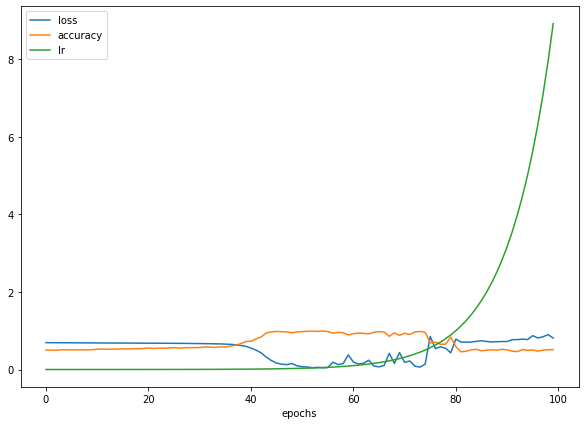

In [ ]:
# Check history
df(history_9.history).plot(figsize=(10, 7), xlabel="epochs")

Text(0.5, 1.0, 'Learning rate vs. Loss')

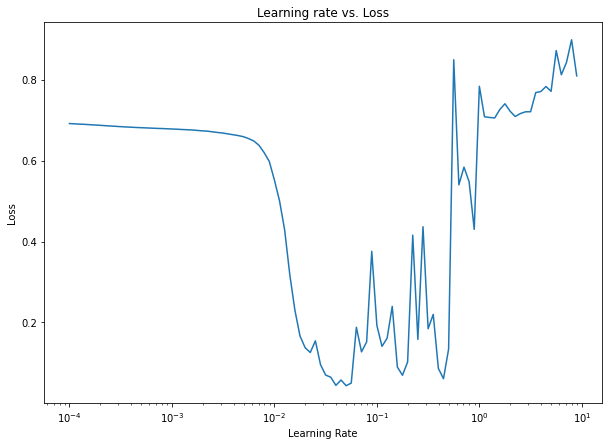

In [ ]:
# Plot learning rate vs loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. Loss")

In [ ]:
# Optimum learning rate is between below 2. Always take the first point (actual best point would be 0.02 - where it is still descending - but not flat).
10**-2, 10**-1

(0.01, 0.1)

In [ ]:
# Example of other typical learning rate values
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [ ]:
# Create a model with 0.02 learning rate
# Set seed
tf.random.set_seed(42)

# Create model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile model
model_10.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                 loss=tf.keras.losses.BinaryCrossentropy(),
                 metrics=["accuracy"])

# Fit model
history = model_10.fit(X_train, y_train, epochs=20, verbose=0)

# Evaluate model
model_10.evaluate(X_test, y_test)


7/7 [==============================] - 0s 2ms/step - loss: 0.0381 - accuracy: 0.9900


[0.03806868940591812, 0.9900000095367432]

More classification evaluation methods

* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* Scikit-learn classification model

In [ ]:
# Check the accuracy of the model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.0381 - accuracy: 0.9900
Model loss on the test set: 0.03806868940591812
Model accuracy on the test set: 99.00%


Confusion matrix
* True positive = model predicts 1 when truth is 1
* True negative = model predicts 0 when truth is 0
* False positive = model predicts 1 when truth is 0
* False negative = model predicts 0 when truth is 1

In [ ]:
# Calculate confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(X_test)

In [ ]:
# These 2 are of 2 different type. 1 is binary, other is probability
# To make them same, we need to make the probability value into it's closest integer value
y_test[:10], y_preds[:10]

(array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0]), array([[9.9864423e-01],
        [1.6500354e-03],
        [9.9851769e-01],
        [2.5334954e-04],
        [9.0702385e-01],
        [8.4187770e-01],
        [4.3469667e-04],
        [1.0894243e-04],
        [9.9769509e-01],
        [5.7730079e-04]], dtype=float32))

In [ ]:
# Let's make them same type before creating confusion matrix
tf.squeeze(tf.cast(tf.round(y_preds), tf.int32))

<tf.Tensor: shape=(200,), dtype=int32, numpy=
array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1], dtype=int32)>

In [ ]:
# Create confusion matrix
confusion_matrix(y_test, tf.squeeze(tf.cast(tf.round(y_preds), tf.int32)))

array([[99,  1],
       [ 1, 99]])

In [ ]:
# Let's make confusion matrix more understandable
# Create a function for drawing confusion matrix
import itertools
def plot_confusion_matrix(true_label, prediction_label, classes=None, figsize=(10, 10), text_size=15):

  # Create confusion matrix
  cm = confusion_matrix(true_label, prediction_label)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]

  n_classes = cm.shape[0]

  fig, ax = plt.subplots(figsize=figsize)

  # Create matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
    horizontalalignment="center",
    color="white" if cm[i, j] > threshold else "black",
    size=text_size)

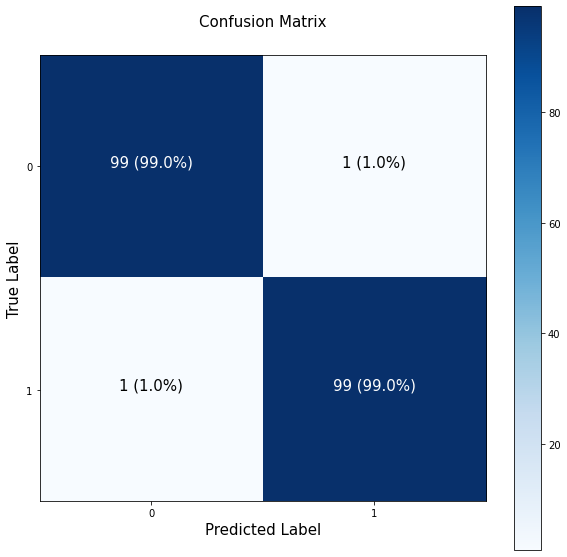

In [ ]:
# Draw the confusion matrix
plot_confusion_matrix(y_test, tf.squeeze(tf.cast(tf.round(y_preds), tf.int32)))

Multiclass classification - When you have more than 2 options to predict, that is a multiclass classification problem

We are doing below example
https://www.tensorflow.org/tutorials/keras/classification

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.2


In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
# Show first training example
train_images[1]


array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

Looking at this, it looks like, we have 60k images with 28 by 28 pixels for images

For labels, we have 0 - 9 assigned to every cloth - each for a different class

In [ ]:
# What is the first image classification
train_labels[0]

9

From the link, we know 9 is an ankle boot.

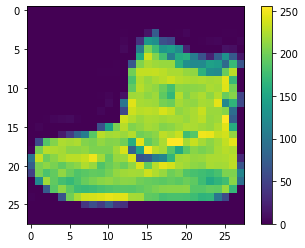

In [ ]:
# Draw the first sample
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
# Let's create a list of classnames
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
len(class_names)
# From the class names, it looks like an ankle boot

10

In [ ]:
# Data normalization
train_images.min(), train_images.max()

(0, 255)

In [ ]:
# Normalize the data so all data is between 0 - 1
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

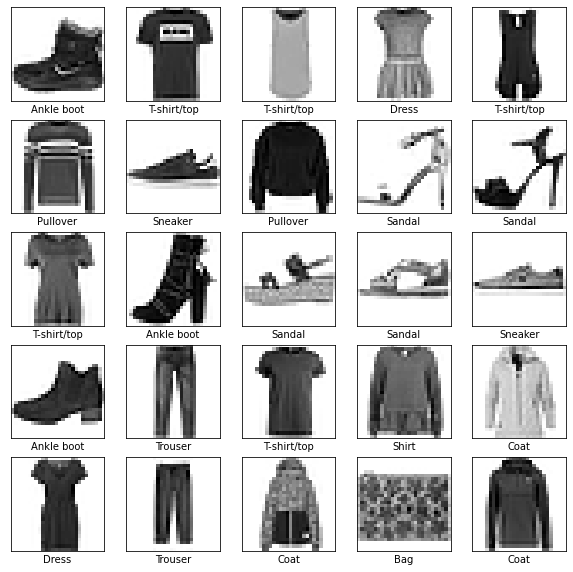

In [ ]:
# Normalization worked. Let's draw first 25 images with labels
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

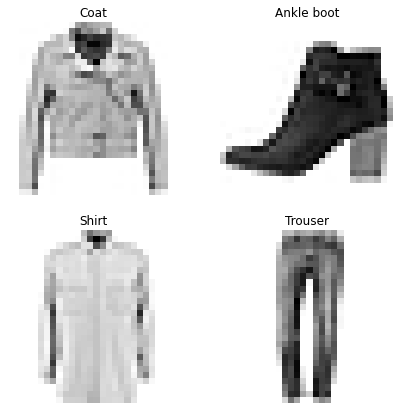

In [ ]:
# Or we can visualize randomly
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_images)))
  plt.imshow(train_images[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

* Input shape = 28 x 28 (shape of one image)
* Output shape = 10 (one per class of clothing)
* Loss function = tf.keras.losses.CategoricalCrossentropy() (instead of BinaryCrossentropy which is for binary classificaiton, but we are doing multiclass classification)
> If the output is one-hot encoded, use CategoricalCrossentropy
> If the output is in integer, use SparseCategoricalCrossentropy

* Output layer activiation = softmax (not sigmoid)

CategoricalCrossentropy (from documentation)

Use this crossentropy loss function when there are two or more label classes. We expect **labels to be provided in a one_hot representation**. *If you want to provide labels as integers*, please use **SparseCategoricalCrossentropy** loss.

In [ ]:
# Building model
tf.random.set_seed(42)

model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # Usually we need to flatten the input layer to one dimensional array
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# Compile
model_11.compile(optimizer=tf.keras.optimizers.Adam(),
                 loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 metrics=["accuracy"])

# Fit
history = model_11.fit(train_images,
                                train_labels,
                                epochs=10,
                                validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

In [ ]:
# Let's do the same thing, but with one-hot encoding for the label
tf.random.set_seed(42)

model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# Compile
model_11.compile(optimizer=tf.keras.optimizers.Adam(),
                 loss=tf.keras.losses.CategoricalCrossentropy(),
                 metrics=["accuracy"])

# Fit
history = model_11.fit(train_images,
                                tf.one_hot(train_labels, 10),
                                epochs=10,
                                validation_data=(test_images, tf.one_hot(test_labels, 10)))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

In [ ]:
# The model isn't just guessing. If it was just guessing, it's accuracy would've been 100/10 (10 - for 10 guesses) = 10%. But our model is accurate 80% of the times

In [ ]:
model_11.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_25 (Dense)            (None, 4)                 3140      
                                                                 
 dense_26 (Dense)            (None, 4)                 20        
                                                                 
 dense_27 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


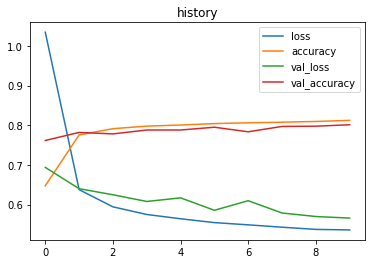

In [ ]:
df(history.history).plot(title="history")

Finding the ideal learning rate

In [ ]:
# Seed
tf.random.set_seed(42)

# Create
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile
model_13.compile(optimizer=tf.keras.optimizers.Adam(),
                 loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 metrics=["accuracy"])

# callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit
find_lr_histroy = model_13.fit(train_images,
                               train_labels,
                               epochs=40,
                               validation_data=(test_images, test_labels),
                               callbacks=[lr_scheduler])


Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

Text(0.5, 1.0, 'Finding ideal learning rate')

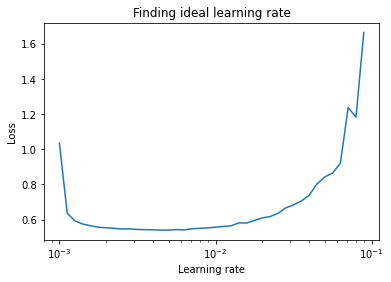

In [ ]:
# Plot learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_histroy.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding ideal learning rate")

In [ ]:
# Ideal rate
10**-3

0.001

In [ ]:
# Refit model with ideal learning rate
# Set seed
tf.random.set_seed(42)

# Build
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile
model_14.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 metrics=["accuracy"])

# Fit
history_14 = model_14.fit(train_images,
                          train_labels,
                          epochs=20,
                          validation_data=(test_images, test_labels))

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

In [ ]:
# Predict the model
y_probs = model_14.predict(test_images) # probs = "prediction probabilities"

# View first 5 predictions
y_probs[:5]

array([[8.56299753e-11, 3.53615629e-13, 2.66337556e-05, 4.63562024e-08,
        5.09498605e-05, 9.61192474e-02, 8.17780403e-08, 9.18688551e-02,
        4.06052778e-03, 8.07873666e-01],
       [3.42785552e-06, 1.28992649e-16, 9.59891498e-01, 2.05162564e-07,
        1.53292371e-02, 2.45320095e-13, 2.41428725e-02, 1.13834485e-28,
        6.32718089e-04, 4.47896404e-08],
       [6.10630595e-05, 9.96576726e-01, 4.38669758e-08, 3.34058981e-03,
        1.32494861e-05, 1.43831603e-21, 8.27906115e-06, 7.32374630e-18,
        5.48116041e-08, 4.92251402e-14],
       [7.50314357e-05, 9.90536869e-01, 4.25285322e-07, 9.22318175e-03,
        1.36231421e-04, 1.82760903e-18, 2.68082422e-05, 4.81248308e-14,
        1.45215904e-06, 2.22114601e-11],
       [7.21899569e-02, 1.54957536e-06, 2.55668938e-01, 1.03631355e-02,
        4.35413495e-02, 1.10693023e-13, 6.16930187e-01, 6.75438989e-23,
        1.30491622e-03, 1.21404065e-09]], dtype=float32)

In [ ]:
# Convert prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

# View first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

Interpreting the results
* It is mostly right - as diagonal results are the darkest
* It is predicting T-shirt/top 69.6% correctly, however, it predicted shirt to be T-shirt/top 16.0% of the times. Which is understandable as they look similar.


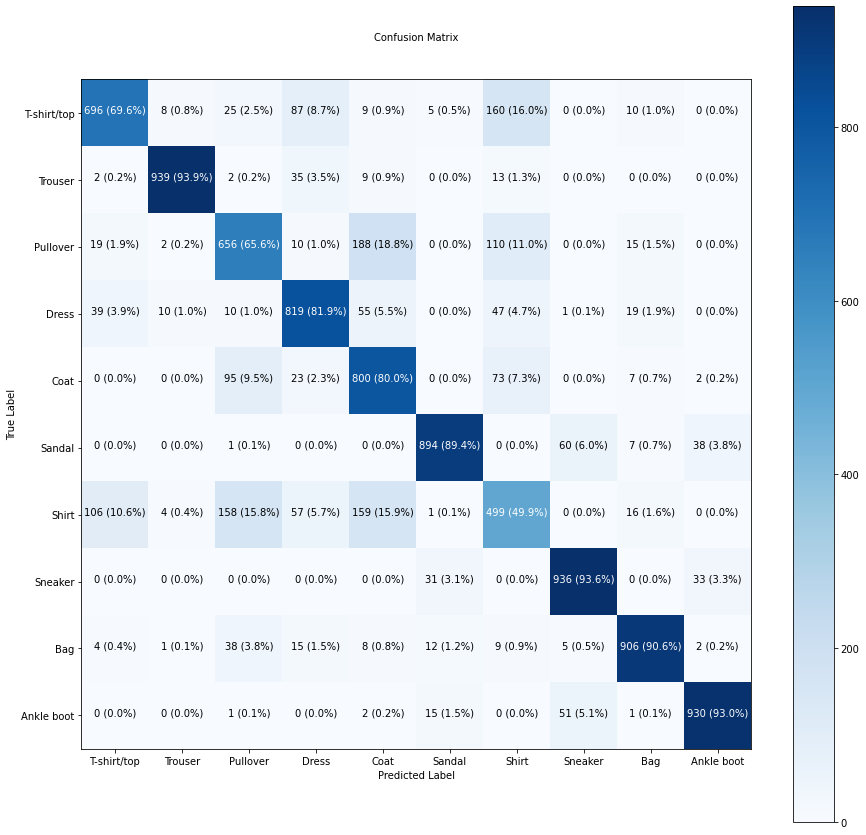

In [ ]:
# Evaluate using confusion matrix
plot_confusion_matrix(test_labels, y_preds, classes=class_names, figsize=(15, 15), text_size=10)

Now, let's experiment further
* Plot a random image
* Make a prediction on that image
* Label the image with true label and predicted label

In [ ]:
def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plots it and labels with prediction and truth label
  """
  # Set up random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # Set the color red/green based on the prediction is right or wrong

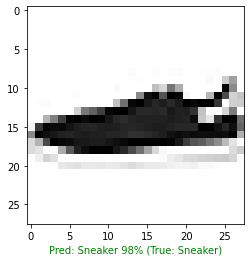

In [ ]:
# Check a random image and prediction
plot_random_image(model=model_14,
                  images=test_images,
                  true_labels=test_labels,
                  classes=class_names)

Find out what pattern is our model learning?

In [ ]:
model_14.layers

In [ ]:
# Extract the second layer
model_14.layers[1]

In [ ]:
# Get the patterns of a layer
weights, biases = model_14.layers[1].get_weights()

# shapes
weights, weights.shape

(array([[ 0.7150263 , -0.06077093, -0.99763095, -1.0484313 ],
        [ 0.2773212 , -0.471554  , -0.52916455,  0.02329255],
        [ 0.7752433 ,  0.5402759 , -1.128857  , -0.7426156 ],
        ...,
        [-0.3945342 ,  0.47628632, -0.2264153 ,  0.2550593 ],
        [-0.40515798,  0.61810046,  0.23928414, -0.50387603],
        [ 0.23884593,  0.11606961, -0.12131374,  0.04352392]],
       dtype=float32), (784, 4))

In [ ]:
biases, biases.shape

(array([ 2.4485964e-02, -6.1471871e-04, -2.7230152e-01,  8.1124878e-01],
       dtype=float32), (4,))

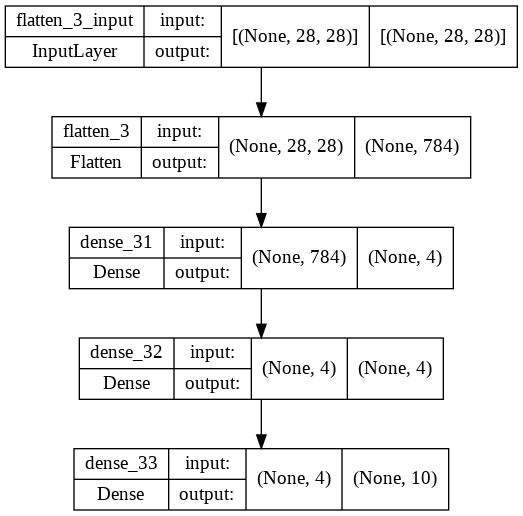

In [ ]:
from tensorflow.keras.utils import plot_model
# See input and output of each layer
plot_model(model_14, show_shapes=True)